In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder

# Importando os Dados
É importante observar que a planilha de formulações foi unida à planilha com as informações sobre os lipídios.

In [89]:
df = pd.read_csv('FormulacoesNano.csv', sep=';', encoding='utf-8-sig')
df.columns = df.columns.str.lower()
df.head()

,formulacao,manteiga_1,manteiga_2,oleo,perc_manteiga_1,perc_manteiga_2,perc_tensoativo,pdi,tamanho,translucida,...,perc_ac_caprico2,perc_ac_laurico2,perc_ac_miristico2,perc_ac_palmitoleico2,perc_ac_beenico2,perc_ac_valerico2,perc_ac_araquidico2,perc_outros2,perc_ag_saturados2,perc_ag_insaturados2
0,1,Tucumã,0,Tucumã,25.00,0.0,50.00,0.104,31.49,1,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
1,2,Tucumã,0,Tucumã,16.65,0.0,33.35,0.131,91.71,1,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
2,3,Tucumã,0,Tucumã,50.00,0.0,33.35,0.135,87.85,1,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
3,4,Tucumã,0,Tucumã,37.50,0.0,25.00,0.252,105.20,0,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
4,5,Tucumã,0,Tucumã,25.00,0.0,25.00,0.299,150.00,0,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0


# Visualização dos Dados
Vamos analisar os tipos de dados e verificar se há dados faltantes.

In [90]:
df.describe()

,formulacao,perc_manteiga_1,perc_manteiga_2,perc_tensoativo,pdi,tamanho,translucida,pontodenuvem,pontofusao1,perc_ac_palmitico1,...,perc_ac_caprico2,perc_ac_laurico2,perc_ac_miristico2,perc_ac_palmitoleico2,perc_ac_beenico2,perc_ac_valerico2,perc_ac_araquidico2,perc_outros2,perc_ag_saturados2,perc_ag_insaturados2
count,132.000000,132.000000,132.000000,132.000000,131.000000,131.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.0,132.000000,132.000000,132.000000,121.000000,11.0,121.000000,132.000000,132.000000
mean,6.000000,28.872848,5.239394,51.755182,0.405359,10561.653511,0.318182,0.409091,32.416667,13.250000,...,0.125000,0.0,0.010833,0.960000,1.545833,0.072727,2.0,1.272727,33.805000,57.860833
std,3.174324,13.651383,12.907988,139.804994,0.263287,51166.078501,0.467545,0.493539,6.911702,17.532576,...,0.416157,0.0,0.036067,1.422532,4.695580,0.230940,0.0,3.206764,18.145412,23.050158
min,1.000000,0.333000,0.000000,0.333000,0.040000,22.090000,0.000000,0.000000,27.000000,4.500000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000
25%,3.000000,16.650000,0.000000,25.000000,0.195700,53.810000,0.000000,0.000000,27.000000,7.500000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,25.750000,54.750000
50%,6.000000,25.000000,0.000000,33.350000,0.337000,270.960000,0.000000,0.000000,31.250000,7.750000,...,0.000000,0.0,0.000000,0.360000,0.000000,0.000000,2.0,0.000000,31.500000,62.500000
75%,9.000000,37.500000,0.000000,50.000000,0.537500,795.000000,1.000000,1.000000,33.125000,9.500000,...,0.000000,0.0,0.000000,1.000000,0.012500,0.000000,2.0,0.000000,42.000000,72.250000
max,11.000000,50.000000,50.000000,1167.000000,1.000000,500398.000000,1.000000,1.000000,53.000000,71.000000,...,1.500000,0.0,0.130000,4.000000,17.000000,0.800000,2.0,11.000000,72.660000,86.000000


### Translúcida

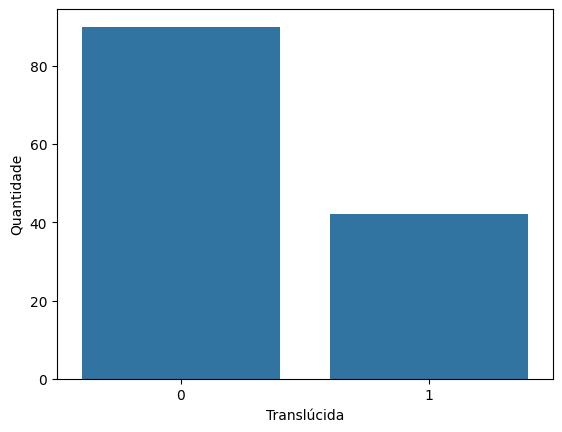

In [91]:

# 1 = SIM
# 0 = NÃO
plt.figure()
sns.countplot(df, x='translucida')
plt.xlabel('Translúcida')
plt.ylabel('Quantidade')
plt.show()

### Ponto de Nuvem

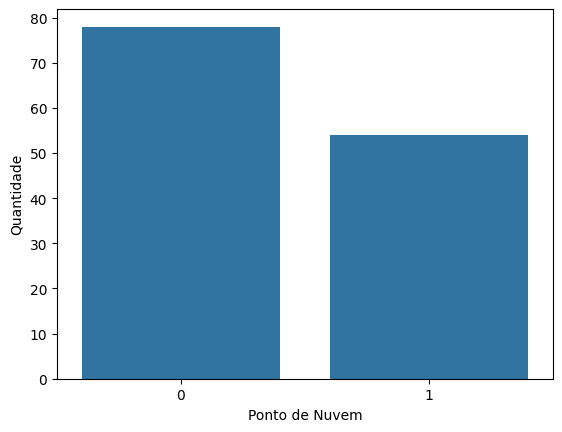

In [92]:

plt.figure()
sns.countplot(df, x='pontodenuvem')
plt.xlabel('Ponto de Nuvem')
plt.ylabel('Quantidade')
plt.show()

### Lipídio 1

In [93]:
df_lipidio_1 = df['lipidio1'].value_counts().reset_index()
df_lipidio_1

,lipidio1,count
0,Manteiga de cupuaçu,44
1,Manteiga de murumuru,33
2,Manteiga de Tucumã,22
3,Manteiga de Ucuuba,11
4,Manteiga de Manga,11
5,Manteiga de Bacuri,11


### Lipídio 2

In [94]:
df_lipidio_2 = df['lipidio2'].value_counts().reset_index()
df_lipidio_2

,lipidio2,count
0,Óleo de Pequi,22
1,Óleo de Açaí,22
2,Óleo de Tucumã,11
3,Óleo de urucum,11
4,Manteiga de cacau,11
5,Óleo de Buriti,11
6,Óleo de Jambu,11
7,Óleo de andiroba,11
8,Óleo de Pracaxi,11
9,Manteiga de cupuaçu,11


### Correlação Lipídios x PDI

In [95]:
df[df['pdi'] < 0.3][['lipidio1']].value_counts().reset_index()

,lipidio1,count
0,Manteiga de murumuru,22
1,Manteiga de Tucumã,16
2,Manteiga de cupuaçu,9
3,Manteiga de Ucuuba,6
4,Manteiga de Bacuri,2
5,Manteiga de Manga,1


In [96]:
df[df['pdi'] < 0.3][['lipidio2']].value_counts().reset_index()

,lipidio2,count
0,Óleo de Açaí,10
1,Óleo de Tucumã,9
2,Óleo de urucum,7
3,Óleo de Jambu,7
4,Óleo de Buriti,6
5,Manteiga de cupuaçu,6
6,Manteiga de cacau,4
7,Óleo de Pequi,4
8,Óleo de Pracaxi,2
9,Óleo de andiroba,1


In [97]:

df[df['pdi'] < 0.3][['lipidio1','lipidio2']].value_counts().reset_index()

,lipidio1,lipidio2,count
0,Manteiga de Tucumã,Óleo de Tucumã,9
1,Manteiga de murumuru,Óleo de Açaí,9
2,Manteiga de Tucumã,Óleo de urucum,7
3,Manteiga de murumuru,Óleo de Jambu,7
4,Manteiga de Ucuuba,Óleo de Buriti,6
5,Manteiga de murumuru,Manteiga de cupuaçu,6
6,Manteiga de cupuaçu,Manteiga de cacau,4
7,Manteiga de cupuaçu,Óleo de Pequi,4
8,Manteiga de Bacuri,Óleo de Pracaxi,2
9,Manteiga de Manga,Óleo de andiroba,1


<Axes: >

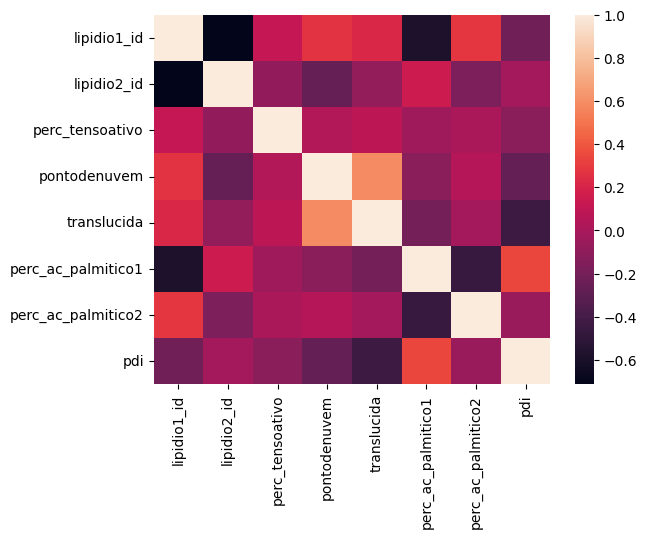

In [98]:
df['lipidio1_id'] = LabelEncoder().fit_transform(df['lipidio1'])
df['lipidio2_id'] = LabelEncoder().fit_transform(df['lipidio2'])

sns.heatmap(df[['lipidio1_id', 'lipidio2_id', 'perc_tensoativo', 'pontodenuvem','translucida', 'perc_ac_palmitico1', 'perc_ac_palmitico2', 'pdi']].corr())

In [99]:
df

,formulacao,manteiga_1,manteiga_2,oleo,perc_manteiga_1,perc_manteiga_2,perc_tensoativo,pdi,tamanho,translucida,...,perc_ac_miristico2,perc_ac_palmitoleico2,perc_ac_beenico2,perc_ac_valerico2,perc_ac_araquidico2,perc_outros2,perc_ag_saturados2,perc_ag_insaturados2,lipidio1_id,lipidio2_id
0,1,Tucumã,0,Tucumã,25.00,0.00,50.00,0.104,31.49,1,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
1,2,Tucumã,0,Tucumã,16.65,0.00,33.35,0.131,91.71,1,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
2,3,Tucumã,0,Tucumã,50.00,0.00,33.35,0.135,87.85,1,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
3,4,Tucumã,0,Tucumã,37.50,0.00,25.00,0.252,105.20,0,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
4,5,Tucumã,0,Tucumã,25.00,0.00,25.00,0.299,150.00,0,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7,Murumuru,Cupuaçu,0,50.00,25.00,25.00,0.430,165629.00,0,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1
128,8,Murumuru,Cupuaçu,0,33.35,16.65,50.00,0.152,28658.00,1,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1
129,9,Murumuru,Cupuaçu,0,16.65,25.00,58.35,0.327,31543.00,1,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1
130,10,Murumuru,Cupuaçu,0,33.35,50.00,16.65,0.249,500398.00,0,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1


# Análise de Correlações
Agora, iremos analisar as propriedades dos lipídios que mais impactaram para o PDI.

In [100]:
print(df.columns)
df.drop(columns=['formulacao', 'translucida', 'pontodenuvem'], inplace=True)
df = df.fillna(0)

Index(['formulacao', 'manteiga_1', 'manteiga_2', 'oleo', 'perc_manteiga_1',
       'perc_manteiga_2', 'perc_tensoativo', 'pdi', 'tamanho', 'translucida',
       'pontodenuvem', 'lipidio1', 'pontofusao1', 'perc_ac_palmitico1',
       'perc_ac_estearico1', 'perc_ac_oleico1', 'perc_ac_linoleico1',
       'perc_ac_vacenico1', 'perc_ac_linolenico1', 'perc_ac_caprilico1',
       'perc_ac_caprico1', 'perc_ac_laurico1', 'perc_ac_miristico1',
       'perc_ac_palmitoleico1', 'perc_ac_beenico1', 'perc_ac_valerico1',
       'perc_ac_araquidico1', 'perc_outros1', 'perc_ag_saturados1',
       'perc_ag_insaturados1', 'lipidio2', 'pontofusao2', 'perc_ac_palmitico2',
       'perc_ac_estearico2', 'perc_ac_oleico2', 'perc_ac_linoleico2',
       'perc_ac_vacenico2', 'perc_ac_linolenico2', 'perc_ac_caprilico2',
       'perc_ac_caprico2', 'perc_ac_laurico2', 'perc_ac_miristico2',
       'perc_ac_palmitoleico2', 'perc_ac_beenico2', 'perc_ac_valerico2',
       'perc_ac_araquidico2', 'perc_outros2', 'perc_ag_s

                    index  perc_manteiga_1       pdi  pontofusao1  \
1                     pdi         0.120379  1.000000     0.156643   
3      perc_ac_palmitico1         0.062065  0.340646     0.084364   
13       perc_ac_caprico2         0.056835  0.334242     0.113123   
17    perc_ac_araquidico2         0.056835  0.334242     0.113123   
15       perc_ac_beenico2         0.062302  0.326536     0.113248   
18           perc_outros2         0.071482  0.302971     0.112729   
10   perc_ag_insaturados1         0.139152  0.215981    -0.478531   
5         perc_ac_oleico1         0.171328  0.204820    -0.522561   
12        perc_ac_oleico2        -0.046012  0.191017     0.365385   
2             pontofusao1        -0.002296  0.156643     1.000000   
16      perc_ac_valerico2         0.056936  0.149910     0.901334   
0         perc_manteiga_1         1.000000  0.120379    -0.002296   
20   perc_ag_insaturados2        -0.116265  0.120171     0.220073   
9            perc_outros1         

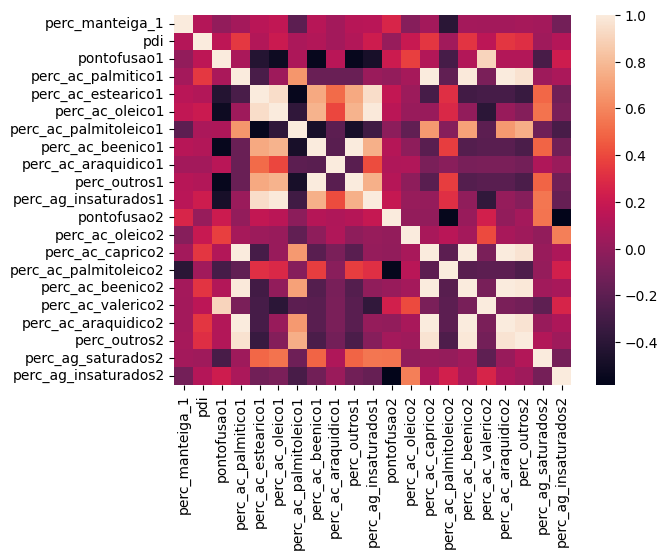

In [101]:
df['lipidio1_id'] = LabelEncoder().fit_transform(df['lipidio1'])
df['lipidio2_id'] = LabelEncoder().fit_transform(df['lipidio2'])

# Vamos remover o Perc_Ac_Araquidico 1 e 2 porque estão preenchidos apenas em 1 formulação
# df = df.drop(columns=['perc_ac_vacenico1', 'perc_ac_vacenico2', 'perc_ac_caprico1', 'perc_ac_caprico2', 'perc_ac_araquidico1', 'perc_ac_araquidico2'])
corr_matrix = df.corr(numeric_only=True)


cols = corr_matrix['pdi'][corr_matrix['pdi'] > 0].index.tolist()
corr_matrix = corr_matrix.loc[cols, cols]
sns.heatmap(corr_matrix)
print(corr_matrix.reset_index().sort_values(by="pdi", ascending=False))

<Axes: >

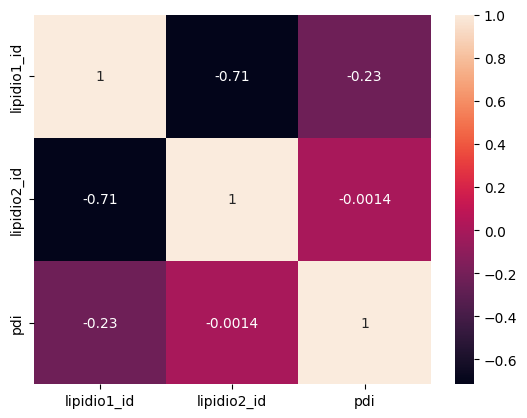

In [103]:
df[['lipidio1_id', 'lipidio2_id', 'pdi']].corr()

sns.heatmap(df[['lipidio1_id', 'lipidio2_id', 'pdi']].corr(), annot=True)

<Axes: >

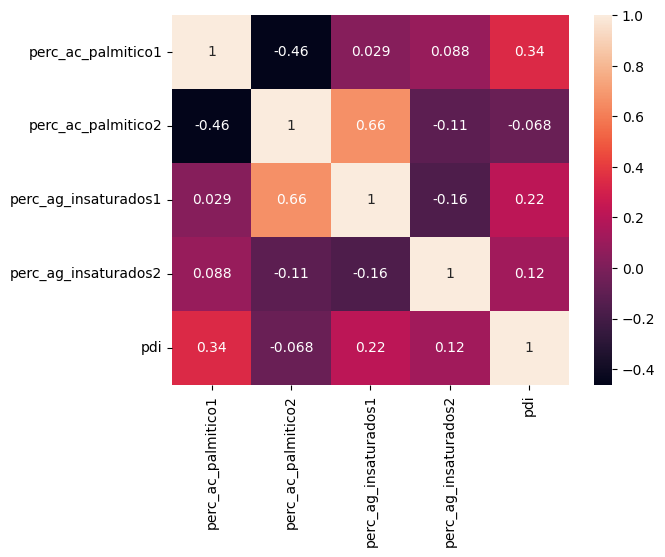

In [104]:
df[['lipidio1_id', 'lipidio2_id', 'pdi']].corr()

sns.heatmap(df[['perc_ac_palmitico1', 'perc_ac_palmitico2', 'perc_ag_insaturados1', 'perc_ag_insaturados2', 'pdi']].corr(), annot=True)

# Ajustes das Proporções
Em conversa com a Karen, percebemos que usar valores percentuais não é a melhor alternativa para representar a quantidade de ácidos, visto que o percentual é relativo à quantidade do lipídio.

Portanto, criarei novas colunas representando a proporção entre eles.

In [105]:
colunas_percentuais = [col for col in df.columns if 'perc' in col]
colunas_percentuais_normalizadas = ['norm_' + col for col in df.columns if 'perc' in col]


for col in colunas_percentuais:
    if '1' in col:
        df['norm_' + col] = (df['perc_manteiga_1'] / 100)  * df[col]
    else:            
        df['norm_' + col] = (df['perc_manteiga_2']/ 100) * df[col]

df[colunas_percentuais_normalizadas].head()

,norm_perc_manteiga_1,norm_perc_manteiga_2,norm_perc_tensoativo,norm_perc_ac_palmitico1,norm_perc_ac_estearico1,norm_perc_ac_oleico1,norm_perc_ac_linoleico1,norm_perc_ac_vacenico1,norm_perc_ac_linolenico1,norm_perc_ac_caprilico1,...,norm_perc_ac_caprico2,norm_perc_ac_laurico2,norm_perc_ac_miristico2,norm_perc_ac_palmitoleico2,norm_perc_ac_beenico2,norm_perc_ac_valerico2,norm_perc_ac_araquidico2,norm_perc_outros2,norm_perc_ag_saturados2,norm_perc_ag_insaturados2
0,6.250000,0.0,0.0,1.87500,0.500,2.2500,0.0,0.0,0.87500,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.772225,0.0,0.0,1.24875,0.333,1.4985,0.0,0.0,0.58275,0.1665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.000000,0.0,0.0,3.75000,1.000,4.5000,0.0,0.0,1.75000,0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.062500,0.0,0.0,2.81250,0.750,3.3750,0.0,0.0,1.31250,0.3750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.250000,0.0,0.0,1.87500,0.500,2.2500,0.0,0.0,0.87500,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
colunas_percentuais_normalizadas.append('pdi')
df[colunas_percentuais_normalizadas].corr().head()


,norm_perc_manteiga_1,norm_perc_manteiga_2,norm_perc_tensoativo,norm_perc_ac_palmitico1,norm_perc_ac_estearico1,norm_perc_ac_oleico1,norm_perc_ac_linoleico1,norm_perc_ac_vacenico1,norm_perc_ac_linolenico1,norm_perc_ac_caprilico1,...,norm_perc_ac_laurico2,norm_perc_ac_miristico2,norm_perc_ac_palmitoleico2,norm_perc_ac_beenico2,norm_perc_ac_valerico2,norm_perc_ac_araquidico2,norm_perc_outros2,norm_perc_ag_saturados2,norm_perc_ag_insaturados2,pdi
norm_perc_manteiga_1,1.000000,-0.048282,-0.061476,0.335535,0.363802,0.492607,0.440569,NaN,0.181300,0.237501,...,NaN,-0.006186,-0.006186,-0.006405,NaN,NaN,-0.006186,-0.009005,-0.008804,0.111918
norm_perc_manteiga_2,-0.048282,1.000000,0.814468,-0.084326,0.019817,-0.000306,0.165898,NaN,-0.143256,0.200252,...,NaN,0.652639,0.652639,0.675746,NaN,NaN,0.652639,0.949973,0.928742,-0.119176
norm_perc_tensoativo,-0.061476,0.814468,1.000000,-0.106036,0.020201,-0.005582,0.197757,NaN,-0.176979,0.241915,...,NaN,0.626750,0.626750,0.648940,NaN,NaN,0.626750,0.912290,0.891901,-0.146983
norm_perc_ac_palmitico1,0.335535,-0.084326,-0.106036,1.000000,-0.146296,0.179818,-0.171396,NaN,-0.089312,-0.122317,...,NaN,-0.049917,-0.049917,-0.078313,NaN,NaN,-0.076492,-0.089325,-0.094564,0.286656
norm_perc_ac_estearico1,0.363802,0.019817,0.020201,-0.146296,1.000000,0.938618,0.865675,NaN,-0.298826,-0.364187,...,NaN,0.235548,0.235548,-0.173181,NaN,NaN,-0.180686,0.081835,-0.033315,0.130604


<Axes: >

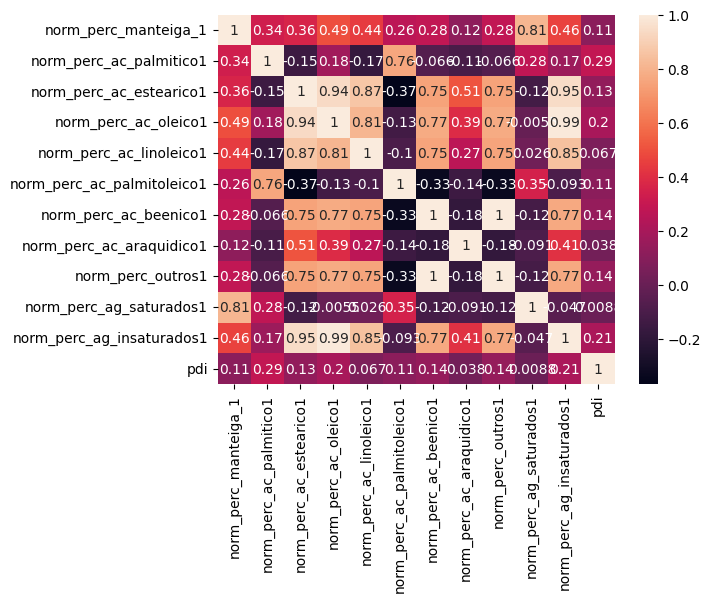

In [ ]:
corr_matrix = df[colunas_percentuais_normalizadas].corr()
cols = corr_matrix['pdi'][corr_matrix['pdi'] > 0].index.tolist()
corr_matrix = corr_matrix.loc[cols, cols]

sns.heatmap(corr_matrix, annot=True, annot_kws=["size":8])